# ** Weather Data Analysis **

## 1. Historische Wetterdaten müssen aus einer CSV-Datei geladen werden

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#data lesen
df = pd.read_parquet("daily_weather.parquet")

# daten anzeigen
print("daten (erste 5 Zeilen):")
print(df.head())

daten (erste 5 Zeilen):
  station_id city_name       date  season  avg_temp_c  min_temp_c  max_temp_c  \
0      41515  Asadabad 1957-07-01  Summer        27.0        21.1        35.6   
1      41515  Asadabad 1957-07-02  Summer        22.8        18.9        32.2   
2      41515  Asadabad 1957-07-03  Summer        24.3        16.7        35.6   
3      41515  Asadabad 1957-07-04  Summer        26.6        16.1        37.8   
4      41515  Asadabad 1957-07-05  Summer        30.8        20.0        41.7   

   precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
0               0.0            NaN               NaN                 NaN   
1               0.0            NaN               NaN                 NaN   
2               1.0            NaN               NaN                 NaN   
3               4.1            NaN               NaN                 NaN   
4               0.0            NaN               NaN                 NaN   

   peak_wind_gust_kmh  avg_sea_l

## 1.a. Countries.csv und Cities.csv Datei interpretieren und zu standardisieren

In [48]:
countries = pd.read_csv("countries.csv")
countries.head()

,country,native_name,iso2,iso3,population,area,capital,capital_lat,capital_lng,region,continent
0,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,Asia
1,Albania,Shqipëria,AL,ALB,2895947.0,28748.0,Tirana,41.326873,19.818791,Southern Europe,Europe
2,Algeria,الجزائر,DZ,DZA,38700000.0,2381741.0,Algiers,36.775361,3.060188,Northern Africa,Africa
3,American Samoa,American Samoa,AS,ASM,55519.0,199.0,Pago Pago,-14.275479,-170.704830,Polynesia,Oceania
4,Angola,Angola,AO,AGO,24383301.0,1246700.0,Luanda,-8.827270,13.243951,Central Africa,Africa


## *** Countries ***

In [52]:
print("\n📌 Countries - Info:")
print(countries.info())


📌 Countries - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      214 non-null    object 
 1   native_name  213 non-null    object 
 2   iso2         213 non-null    object 
 3   iso3         214 non-null    object 
 4   population   210 non-null    float64
 5   area         207 non-null    float64
 6   capital      212 non-null    object 
 7   capital_lat  212 non-null    float64
 8   capital_lng  212 non-null    float64
 9   region       205 non-null    object 
 10  continent    206 non-null    object 
dtypes: float64(4), object(7)
memory usage: 18.5+ KB
None


In [55]:
countries.describe()

,population,area,capital_lat,capital_lng
count,2.100000e+02,2.070000e+02,212.000000,212.000000
mean,3.365144e+07,6.537604e+05,18.812330,16.545432
std,1.330461e+08,1.866909e+06,26.590545,69.625088
min,3.000000e+01,2.020000e+00,-54.283545,-176.174022
25%,7.572605e+05,1.306600e+04,2.874467,-13.375923
50%,6.315500e+06,1.098840e+05,18.025227,16.725786
75%,2.268378e+07,4.817710e+05,41.315970,47.637577
max,1.367110e+09,1.712444e+07,78.223156,179.118650


In [57]:
countries.isnull().sum()

country        0
native_name    1
iso2           1
iso3           0
population     4
area           7
capital        2
capital_lat    2
capital_lng    2
region         9
continent      8
dtype: int64

In [59]:
# Zuerst die Spalten "population" und "area" als Float konvertieren
countries['population'] = countries['population'].astype(float)
countries['area'] = countries['area'].astype(float)

# Fehlende Werte durch den Durchschnitt der jeweiligen Region ersetzen
countries['population'] = countries.groupby('region')['population'].transform(lambda x: x.fillna(x.mean()))
countries['area'] = countries.groupby('region')['area'].transform(lambda x: x.fillna(x.mean()))

# Falls es noch fehlende Werte gibt, ersetze sie durch den allgemeinen Durchschnitt
countries['population'] = countries['population'].fillna(countries['population'].mean())
countries['area'] = countries['area'].fillna(countries['area'].mean())

# Konvertiere die Spalten in ganze Zahlen (Integer)
countries['population'] = countries['population'].astype(int)
countries['area'] = countries['area'].astype(int)

# Die ersten Zeilen der aktualisierten Daten anzeigen
countries.head()

,country,native_name,iso2,iso3,population,area,capital,capital_lat,capital_lng,region,continent
0,Afghanistan,افغانستان,AF,AFG,26023100,652230,Kabul,34.526011,69.177684,Southern and Central Asia,Asia
1,Albania,Shqipëria,AL,ALB,2895947,28748,Tirana,41.326873,19.818791,Southern Europe,Europe
2,Algeria,الجزائر,DZ,DZA,38700000,2381741,Algiers,36.775361,3.060188,Northern Africa,Africa
3,American Samoa,American Samoa,AS,ASM,55519,199,Pago Pago,-14.275479,-170.704830,Polynesia,Oceania
4,Angola,Angola,AO,AGO,24383301,1246700,Luanda,-8.827270,13.243951,Central Africa,Africa


In [61]:
# Die 5 Länder mit der größten Bevölkerung ermitteln
largest_population = countries.nlargest(5, "population")[["country", "population"]]

# Die 5 Länder mit der kleinsten Bevölkerung ermitteln
smallest_population = countries.nsmallest(5, "population")[["country", "population"]]

# Die 5 Länder mit der größten Fläche ermitteln
largest_area = countries.nlargest(5, "area")[["country", "area"]]

# Die 5 Länder mit der kleinsten Fläche ermitteln
smallest_area = countries.nsmallest(5, "area")[["country", "area"]]

# Länder mit möglicherweise fehlerhaften Bevölkerungswerten herausfiltern
invalid_population = countries[(countries["population"] <= 1000) | (countries["population"] > 1_500_000_000)]

# Länder mit möglicherweise fehlerhaften Flächenwerten herausfiltern
invalid_area = countries[(countries["area"] <= 10) | (countries["area"] > 17_000_000)]

# Ergebnisse ausgeben
print("\n--- Länder mit der größten Bevölkerung ---\n", largest_population)
print("\n--- Länder mit der kleinsten Bevölkerung ---\n", smallest_population)


--- Länder mit der größten Bevölkerung ---
            country  population
37           China  1367110000
85           India  1263930000
202  United States   319259000
86       Indonesia   252164800
24          Brazil   203586000

--- Länder mit der kleinsten Bevölkerung ---
                                  country  population
173                        South Georgia          30
65   French Southern and Antarctic Lands         140
38                      Christmas Island        2072
138                       Norfolk Island        2302
180               Svalbard and Jan Mayen        2562


In [63]:
print("\n--- Länder mit der größten Fläche ---\n", largest_area)
print("\n--- Länder mit der kleinsten Fläche ---\n", smallest_area)


--- Länder mit der größten Fläche ---
            country      area
154         Russia  17124442
31          Canada   9984670
37           China   9640011
202  United States   9629091
24          Brazil   8515767

--- Länder mit der kleinsten Fläche ---
             country  area
126          Monaco     2
197          Tuvalu    26
112           Macau    30
138  Norfolk Island    36
19          Bermuda    54


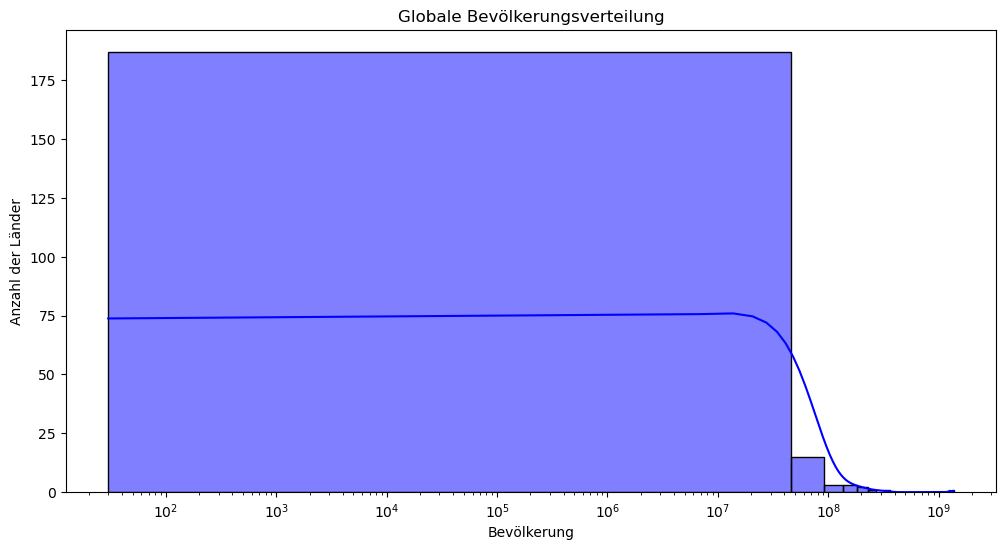

In [89]:
# Histogramm (Bevölkerungsverteilung aller Länder)
plt.figure(figsize=(12, 6))  # Größe der Grafik festlegen

# Erstellen eines Histogramms zur Anzeige der Bevölkerungsverteilung
sns.histplot(countries["population"], bins=30, kde=True, color="blue")

# Achsenbeschriftungen hinzufügen
plt.xlabel("Bevölkerung")  # X-Achse: Bevölkerung (Population)
plt.ylabel("Anzahl der Länder")  # Y-Achse: Anzahl der Länder in jeder Bevölkerungsgruppe

# Titel für die Grafik setzen
plt.title("Globale Bevölkerungsverteilung")  # Titel des Diagramms

# Logarithmische Skala für die X-Achse verwenden, um große Unterschiede besser darzustellen
plt.xscale("log")  

# Diagramm anzeigen
plt.show()

/var/folders/bb/6m7zfmqn4dlckynjdkxpvrrr0000gn/T/ipykernel_1500/256385272.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_population["country"], x=top_population["population"], palette="viridis")


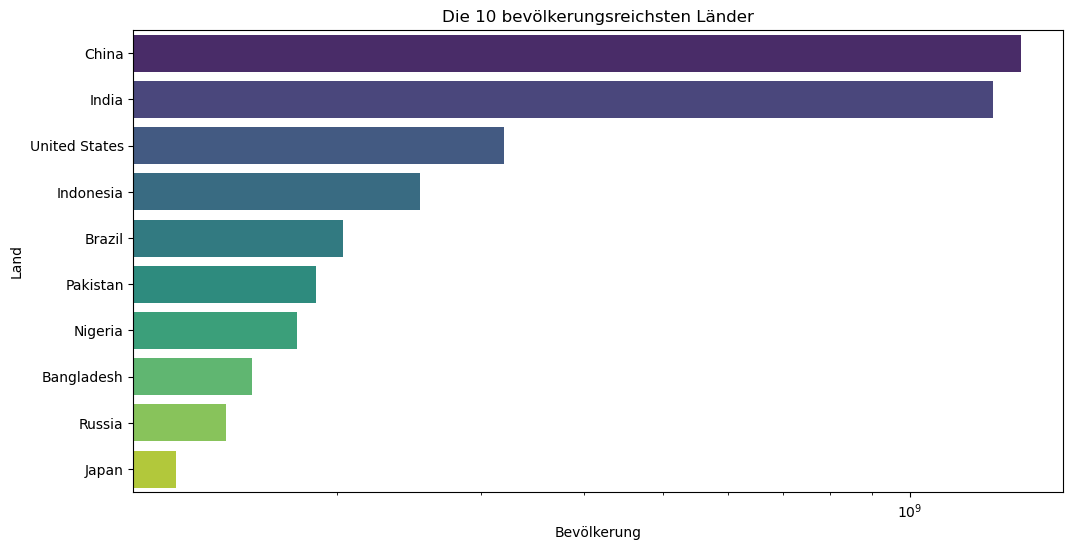

In [91]:
# Die 10 bevölkerungsreichsten Länder auswählen
top_population = countries.nlargest(10, "population")

# Größe der Grafik festlegen
plt.figure(figsize=(12, 6))

# Balkendiagramm zur Darstellung der 10 bevölkerungsreichsten Länder erstellen
sns.barplot(y=top_population["country"], x=top_population["population"], palette="viridis")

# Achsenbeschriftungen hinzufügen
plt.xlabel("Bevölkerung")  # X-Achse: Bevölkerung (Population)
plt.ylabel("Land")  # Y-Achse: Länder

# Titel für das Diagramm setzen
plt.title("Die 10 bevölkerungsreichsten Länder")

# Logarithmische Skala für die X-Achse verwenden, um große Unterschiede besser darzustellen
plt.xscale("log")  

# Diagramm anzeigen
plt.show()

/var/folders/bb/6m7zfmqn4dlckynjdkxpvrrr0000gn/T/ipykernel_1500/1648961667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_population.index, y=continent_population.values, palette="coolwarm")


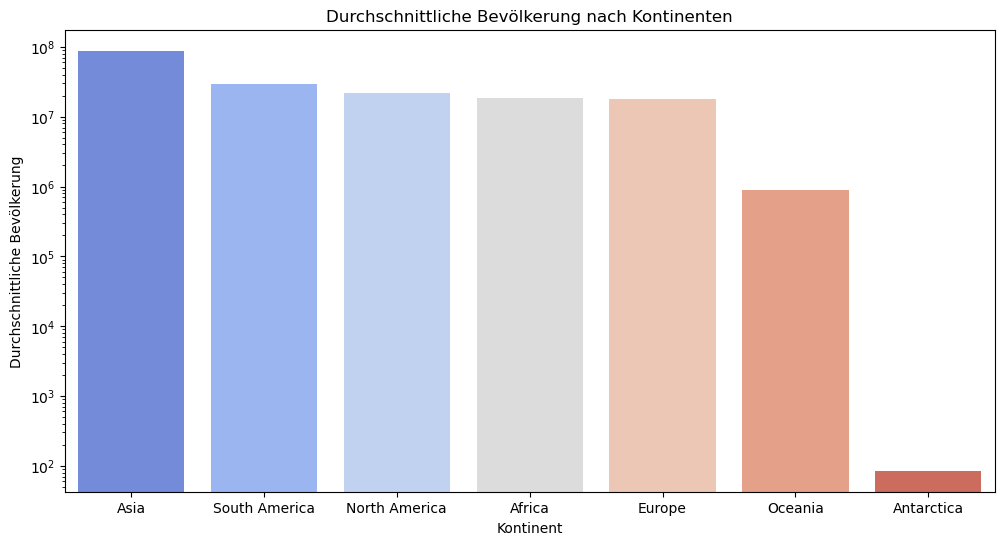

In [93]:
# Größe der Grafik festlegen
plt.figure(figsize=(12, 6))

# Durchschnittliche Bevölkerung pro Kontinent berechnen und absteigend sortieren
continent_population = countries.groupby("continent")["population"].mean().sort_values(ascending=False)

# Balkendiagramm zur Darstellung der durchschnittlichen Bevölkerung pro Kontinent erstellen
sns.barplot(x=continent_population.index, y=continent_population.values, palette="coolwarm")

# Achsenbeschriftungen hinzufügen
plt.xlabel("Kontinent")  # X-Achse: Kontinent
plt.ylabel("Durchschnittliche Bevölkerung")  # Y-Achse: Durchschnittliche Bevölkerung pro Kontinent

# Titel für das Diagramm setzen
plt.title("Durchschnittliche Bevölkerung nach Kontinenten")

# Logarithmische Skala für die Y-Achse verwenden, um große Unterschiede besser darzustellen
plt.yscale("log")  

# Diagramm anzeigen
plt.show()


/var/folders/bb/6m7zfmqn4dlckynjdkxpvrrr0000gn/T/ipykernel_1500/2369594477.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_density["country"], x=top_density["population_density"], palette="magma")


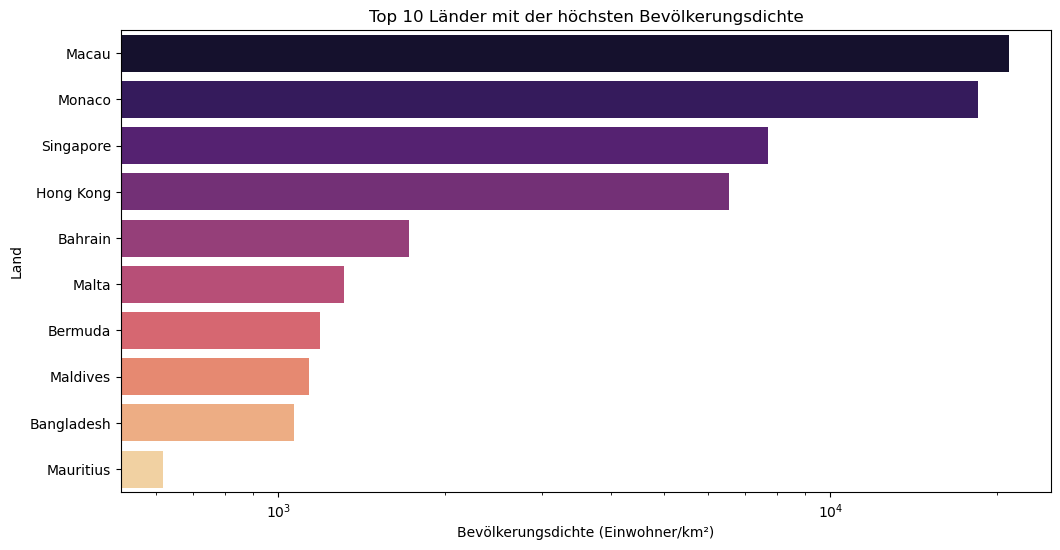

In [95]:
# Bevölkerungsdichte berechnen (Bevölkerung / Fläche)
# Falls die Fläche 0 ist, wird sie durch 1 ersetzt, um eine Division durch Null zu vermeiden
countries["population_density"] = countries["population"] / countries["area"].replace(0, 1)  

# Die 10 Länder mit der höchsten Bevölkerungsdichte auswählen
top_density = countries.nlargest(10, "population_density")

# Größe der Grafik festlegen
plt.figure(figsize=(12, 6))

# Balkendiagramm zur Darstellung der Länder mit der höchsten Bevölkerungsdichte erstellen
sns.barplot(y=top_density["country"], x=top_density["population_density"], palette="magma")

# Achsenbeschriftungen hinzufügen
plt.xlabel("Bevölkerungsdichte (Einwohner/km²)")  # X-Achse: Bevölkerungsdichte
plt.ylabel("Land")  # Y-Achse: Länder

# Titel für das Diagramm setzen
plt.title("Top 10 Länder mit der höchsten Bevölkerungsdichte")

# Logarithmische Skala für die X-Achse verwenden, um große Unterschiede besser darzustellen
plt.xscale("log")

# Diagramm anzeigen
plt.show()

In [97]:
# Startpunkt der Karte und Zoom-Stufe festlegen
country_map = folium.Map(location=[20, 0], zoom_start=2)

# Länder auf der Karte hinzufügen
for index, row in countries.iterrows():
    if pd.notnull(row["capital_lat"]) and pd.notnull(row["capital_lng"]):  # Nur gültige Koordinaten verwenden
        folium.Marker(
            location=[row["capital_lat"], row["capital_lng"]],  # Koordinaten der Hauptstadt
            popup=f"{row['country']} (Hauptstadt: {row['capital']})\nBevölkerung: {row['population']:,}",  # Zusatzinformationen
            tooltip=row["country"],  # Name des Landes als Tooltip anzeigen
            icon=folium.Icon(color="blue", icon="info-sign"),  # Blaue Icons für Länder
        ).add_to(country_map)

# Die interaktive Karte direkt im Notebook anzeigen
country_map

## *** Cities ***

In [65]:
print("\n--- Verdächtige Bevölkerungswerte ---\n", invalid_population)
print("\n--- Verdächtige Flächenwerte ---\n", invalid_area)


--- Verdächtige Bevölkerungswerte ---
                                  country  \
65   French Southern and Antarctic Lands   
173                        South Georgia   

                                           native_name iso2 iso3  population  \
65   Territoire des Terres australes et antarctique...   TF  ATF         140   
173                                      South Georgia   GS  SGS          30   

     area            capital  capital_lat  capital_lng      region   continent  
65   7747  Port-aux-Français   -49.353677    70.243567  Antarctica  Antarctica  
173  7747  King Edward Point   -54.283545   -36.494636  Antarctica  Antarctica  

--- Verdächtige Flächenwerte ---
     country native_name iso2 iso3  population      area capital  capital_lat  \
126  Monaco      Monaco   MC  MCO       36950         2  Monaco    43.732349   
154  Russia      Россия   RU  RUS   146233000  17124442  Moscow    55.750446   

     capital_lng          region continent  
126     7.427683  West

In [71]:
cities = pd.read_csv("cities.csv")
cities.head()

,station_id,city_name,country,state,iso2,iso3,latitude,longitude
0,41515,Asadabad,Afghanistan,Kunar,AF,AFG,34.866000,71.150005
1,38954,Fayzabad,Afghanistan,Badakhshan,AF,AFG,37.129761,70.579247
2,41560,Jalalabad,Afghanistan,Nangarhar,AF,AFG,34.441527,70.436103
3,38947,Kunduz,Afghanistan,Kunduz,AF,AFG,36.727951,68.872530
4,38987,Qala i Naw,Afghanistan,Badghis,AF,AFG,34.983000,63.133300


In [73]:
print("\n📌 Cities - Info:")
print(cities.info())


📌 Cities - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  1245 non-null   object 
 1   city_name   1244 non-null   object 
 2   country     1245 non-null   object 
 3   state       1217 non-null   object 
 4   iso2        1239 non-null   object 
 5   iso3        1245 non-null   object 
 6   latitude    1245 non-null   float64
 7   longitude   1245 non-null   float64
dtypes: float64(2), object(6)
memory usage: 77.9+ KB
None


In [75]:
cities.isnull().sum()

station_id     0
city_name      1
country        0
state         28
iso2           6
iso3           0
latitude       0
longitude      0
dtype: int64

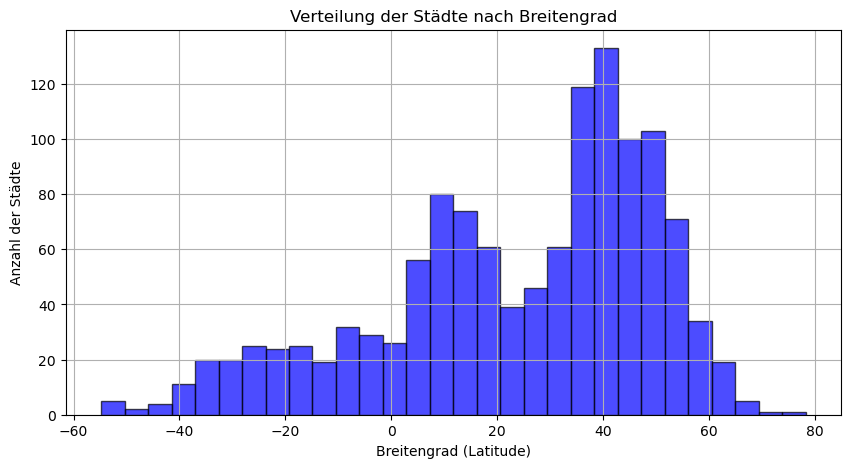

In [77]:
# Erstelle eine neue Abbildung mit einer bestimmten Größe
plt.figure(figsize=(10, 5))

# Erstelle ein Histogramm für die Breitengrade der Städte
plt.hist(cities["latitude"], bins=30, color="blue", alpha=0.7, edgecolor="black")

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Breitengrad (Latitude)")
plt.ylabel("Anzahl der Städte")
plt.title("Verteilung der Städte nach Breitengrad")

# Gitterlinien aktivieren
plt.grid(True)

# Diagramm anzeigen
plt.show()

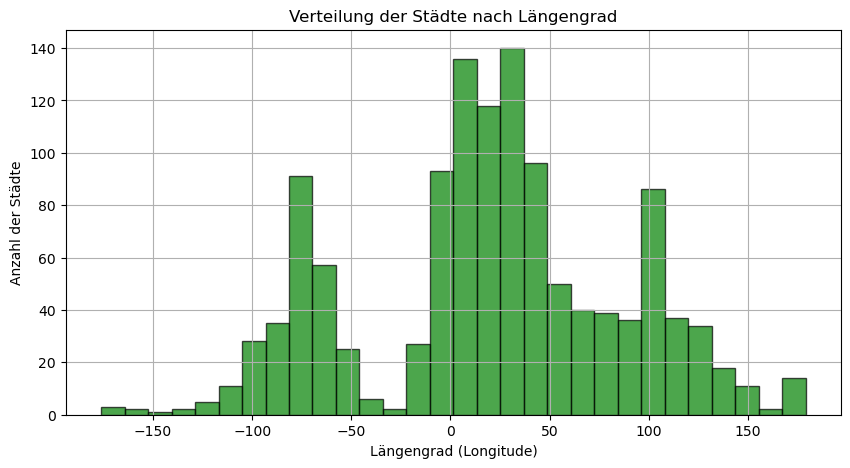

In [79]:
# Erstelle eine neue Abbildung mit einer bestimmten Größe
plt.figure(figsize=(10, 5))

# Erstelle ein Histogramm für die Längengrade der Städte
plt.hist(cities["longitude"], bins=30, color="green", alpha=0.7, edgecolor="black")

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Längengrad (Longitude)")
plt.ylabel("Anzahl der Städte")
plt.title("Verteilung der Städte nach Längengrad")

# Gitterlinien aktivieren
plt.grid(True)

# Diagramm anzeigen
plt.show()

In [81]:
import folium

# Haritanın başlangıç merkezi ve yakınlaştırma seviyesi
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Şehirleri harita üzerine ekleyelim
for index, row in cities.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
    ).add_to(world_map)

# Haritayı notebook içinde görüntüle
world_map

## 2. Alle Datumswerte sind korrekt zu interpretieren und zu standardisieren

In [6]:
#  Datum standardisieren 


In [7]:
print("\nFehlende Werte pro Spalte:")
print(df.isnull().sum())


Fehlende Werte pro Spalte:
station_id                       0
city_name                    13993
date                             0
season                           0
avg_temp_c                 6230907
min_temp_c                 5718229
max_temp_c                 5539346
precipitation_mm           6642500
snow_depth_mm             24208615
avg_wind_dir_deg          24183195
avg_wind_speed_kmh        22350295
peak_wind_gust_kmh        26514277
avg_sea_level_pres_hpa    23618606
sunshine_total_min        26614302
dtype: int64


## 3.Fehlende oder fehlerhafte Wetterdaten sollen erkannt und bereinigt werden. 

In [9]:
# Fehlerhafte Werte erkennen
# Annahmen für Fehler:
# - Temperaturen: min_temp_c < -50 oder max_temp_c > 50 sind unrealistisch
# - avg_temp_c sollte zwischen min_temp_c und max_temp_c liegen
# - Niederschlag: precipitation_mm < 0 ist ungültig
temp_errors = df[(df['min_temp_c'] < -50) | (df['max_temp_c'] > 50) | 
                 (df['avg_temp_c'] < -50) | (df['avg_temp_c'] > 50) |
                 (df['avg_temp_c'] < df['min_temp_c']) | (df['avg_temp_c'] > df['max_temp_c'])]
precip_errors = df[df['precipitation_mm'] < 0]

print("\nFehlerhafte Temperaturwerte:")
print(temp_errors)
print("\nFehlerhafte Niederschlagswerte:")
print(precip_errors)


Fehlerhafte Temperaturwerte:
      station_id city_name       date  season  avg_temp_c  min_temp_c  \
5202       38954  Fayzabad 1914-02-28  Winter        -3.3        -3.2   
6228       38954  Fayzabad 1916-12-20  Winter        -5.6        -4.5   
6229       38954  Fayzabad 1916-12-21  Winter        -6.3        -2.4   
6230       38954  Fayzabad 1916-12-22  Winter        -5.9        -1.9   
6231       38954  Fayzabad 1916-12-23  Winter        -5.8        -2.1   
...          ...       ...        ...     ...         ...         ...   
9693       67975  Masvingo 1979-12-04  Summer        19.5        20.6   
10330      67975  Masvingo 1981-09-01  Spring        13.4        12.8   
10548      67975  Masvingo 1982-04-07  Autumn        29.4        13.4   
11114      67975  Masvingo 1983-10-25  Spring        17.4        18.1   
12709      67975  Masvingo 1988-03-07  Autumn        19.7        19.9   

       max_temp_c  precipitation_mm  snow_depth_mm  avg_wind_dir_deg  \
5202          4.4    

In [10]:
# Daten bereinigen
# Fehlerhafte Werte zu NaN setzen
df['avg_temp_c'] = np.where((df['avg_temp_c'] < -50) | (df['avg_temp_c'] > 50) | 
                            (df['avg_temp_c'] < df['min_temp_c']) | (df['avg_temp_c'] > df['max_temp_c']), 
                            np.nan, df['avg_temp_c'])
df['min_temp_c'] = np.where(df['min_temp_c'] < -50, np.nan, df['min_temp_c'])
df['max_temp_c'] = np.where(df['max_temp_c'] > 50, np.nan, df['max_temp_c'])
df['precipitation_mm'] = np.where(df['precipitation_mm'] < 0, np.nan, df['precipitation_mm'])

# Fehlende Werte interpolieren
df['avg_temp_c'] = df['avg_temp_c'].interpolate(method='linear')
df['min_temp_c'] = df['min_temp_c'].interpolate(method='linear')
df['max_temp_c'] = df['max_temp_c'].interpolate(method='linear')
df['precipitation_mm'] = df['precipitation_mm'].interpolate(method='linear')

In [11]:
# Bereinigte Daten anzeigen
print("\nBereinigte Daten :")
print(df.head())



Bereinigte Daten :
  station_id city_name       date  season  avg_temp_c  min_temp_c  max_temp_c  \
0      41515  Asadabad 1957-07-01  Summer        27.0        21.1        35.6   
1      41515  Asadabad 1957-07-02  Summer        22.8        18.9        32.2   
2      41515  Asadabad 1957-07-03  Summer        24.3        16.7        35.6   
3      41515  Asadabad 1957-07-04  Summer        26.6        16.1        37.8   
4      41515  Asadabad 1957-07-05  Summer        30.8        20.0        41.7   

   precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
0               0.0            NaN               NaN                 NaN   
1               0.0            NaN               NaN                 NaN   
2               1.0            NaN               NaN                 NaN   
3               4.1            NaN               NaN                 NaN   
4               0.0            NaN               NaN                 NaN   

   peak_wind_gust_kmh  avg_sea_level

## 4. Temperaturen ggf. in Celsius (oder andere Einheiten) umrechnen.

In [13]:
# Temperaturen ggf. in eine andere Einheit umrechnen
# Annahme: Daten sind aktuell in Celsius, Ziel ist z. B. Fahrenheit
aktuelle_einheit = "celsius"  
ziel_einheit = "fahrenheit"  

# Umrechnungsfunktionen definieren
def celsius_zu_fahrenheit(c):
    return (c * 9/5) + 32

def fahrenheit_zu_celsius(f):
    return (f - 32) * 5/9

In [14]:
# Umrechnung durchführen
if aktuelle_einheit.lower() != ziel_einheit.lower():
    if ziel_einheit.lower() == "fahrenheit" and aktuelle_einheit.lower() == "celsius":
        df['avg_temp_c'] = df['avg_temp_c'].apply(celsius_zu_fahrenheit)
        df['min_temp_c'] = df['min_temp_c'].apply(celsius_zu_fahrenheit)
        df['max_temp_c'] = df['max_temp_c'].apply(celsius_zu_fahrenheit)
        # Spalten umbenennen
        #df = df.rename(columns={
         #   'avg_temp_c': 'avg_temp_f',
         #   'min_temp_c': 'min_temp_f',
         #   'max_temp_c': 'max_temp_f'
        #})
        print(f"\nTemperaturen von {aktuelle_einheit} nach {ziel_einheit} umgerechnet.")
    elif ziel_einheit.lower() == "celsius" and aktuelle_einheit.lower() == "fahrenheit":
        df['avg_temp_c'] = df['avg_temp_c'].apply(fahrenheit_zu_celsius)
        df['min_temp_c'] = df['min_temp_c'].apply(fahrenheit_zu_celsius)
        df['max_temp_c'] = df['max_temp_c'].apply(fahrenheit_zu_celsius)
        print(f"\nTemperaturen von {aktuelle_einheit} nach {ziel_einheit} umgerechnet.")
    else:
        print("\nFehler: Ungültige Einheitenkombination.")
else:
    print(f"\nKeine Umrechnung nötig, Daten sind bereits in {aktuelle_einheit}.")


Temperaturen von celsius nach fahrenheit umgerechnet.


In [15]:
print("\nBereinigte und umgerechnete Daten :")
print(df.head())


Bereinigte und umgerechnete Daten :
  station_id city_name       date  season  avg_temp_c  min_temp_c  max_temp_c  \
0      41515  Asadabad 1957-07-01  Summer       80.60       69.98       96.08   
1      41515  Asadabad 1957-07-02  Summer       73.04       66.02       89.96   
2      41515  Asadabad 1957-07-03  Summer       75.74       62.06       96.08   
3      41515  Asadabad 1957-07-04  Summer       79.88       60.98      100.04   
4      41515  Asadabad 1957-07-05  Summer       87.44       68.00      107.06   

   precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
0               0.0            NaN               NaN                 NaN   
1               0.0            NaN               NaN                 NaN   
2               1.0            NaN               NaN                 NaN   
3               4.1            NaN               NaN                 NaN   
4               0.0            NaN               NaN                 NaN   

   peak_wind_gust_k

## 5. Berechnung der täglichen Durchschnittstemperaturen.

In [17]:
#Berechnung der täglichen Durchschnittstemperaturen
# Neue Spalte mit Durchschnitt aus min_temp_f und max_temp_f berechnen
df['tag_avg_temp_c'] = (df['min_temp_c'] + df['max_temp_c']) / 2

print(df.head())

  station_id city_name       date  season  avg_temp_c  min_temp_c  max_temp_c  \
0      41515  Asadabad 1957-07-01  Summer       80.60       69.98       96.08   
1      41515  Asadabad 1957-07-02  Summer       73.04       66.02       89.96   
2      41515  Asadabad 1957-07-03  Summer       75.74       62.06       96.08   
3      41515  Asadabad 1957-07-04  Summer       79.88       60.98      100.04   
4      41515  Asadabad 1957-07-05  Summer       87.44       68.00      107.06   

   precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
0               0.0            NaN               NaN                 NaN   
1               0.0            NaN               NaN                 NaN   
2               1.0            NaN               NaN                 NaN   
3               4.1            NaN               NaN                 NaN   
4               0.0            NaN               NaN                 NaN   

   peak_wind_gust_kmh  avg_sea_level_pres_hpa  sunshine_

## 6. Identikation von Maximal- und Minimaltemperaturen.


In [19]:
# Identifikation von Maximal- und Minimaltemperaturen
global_max_temp = df['max_temp_c'].max()
global_min_temp = df['min_temp_c'].min()

print ("max_temp :", global_max_temp , ziel_einheit )
print ("min_temp : ", global_min_temp ,   ziel_einheit)

max_temp : 122.0 fahrenheit
min_temp :  -58.0 fahrenheit


## 7. Berechnung von Mittelwert, Median und Standardabweichung für verschiedene Parameter

In [21]:
# Berechnung von Mittelwert, Median und Standardabweichung für verschiedene Parameter
# Ausgewählte Parameter
parameters = ['avg_temp_c', 'min_temp_c', 'max_temp_c', 'precipitation_mm']

# Globale Statistiken (über alle Daten)
global_stats = df[parameters].agg(['mean', 'median', 'std']).round(2)

print("\nGlobale Statistiken (Mittelwert, Median, Standardabweichung):")
print(global_stats)

# Tägliche Statistiken (pro Tag über alle Stationen)
daily_stats = df.groupby('date')[parameters].agg(['mean', 'median', 'std']).round(2)

print("\nTägliche Statistiken :")
print(daily_stats.head())


Globale Statistiken (Mittelwert, Median, Standardabweichung):
        avg_temp_c  min_temp_c  max_temp_c  precipitation_mm
mean         60.05       50.76       69.11              3.47
median       63.14       53.06       73.58              0.00
std          20.87       20.64       22.28             12.07

Tägliche Statistiken :
           avg_temp_c               min_temp_c               max_temp_c  \
                 mean median    std       mean median    std       mean   
date                                                                      
1750-02-01      65.32  61.88  13.21      68.82  67.46   8.33      86.52   
1750-02-02      65.32  61.88  13.20      70.52  68.18   8.10      86.08   
1750-02-03      65.33  61.88  13.20      65.88  64.94  11.41      80.40   
1750-02-04      63.37  58.82  12.64      62.53  62.78   9.55      80.02   
1750-02-05      65.33  61.87  13.19      66.28  66.38  10.56      81.34   

                         precipitation_mm                
          

In [22]:
#Filter für ein bestimmtes Jahr (z. B. 1957)
year_filter = 1957
df_year = df[df['date'] == year_filter]
year_stats = df_year[parameters].agg(['mean', 'median', 'std']).round(2)

print(f"\nStatistiken für das Jahr {year_filter} (Mittelwert, Median, Standardabweichung):")
print(year_stats)


Statistiken für das Jahr 1957 (Mittelwert, Median, Standardabweichung):
        avg_temp_c  min_temp_c  max_temp_c  precipitation_mm
mean           NaN         NaN         NaN               NaN
median         NaN         NaN         NaN               NaN
std            NaN         NaN         NaN               NaN


## <span style="color:red">muss morgen darüber diskutieren wegen NaN werte !</span>
 

In [24]:
# Filter für eine bestimmte Saison (z. B. "Summer")
season_filter = "Summer"
df_season = df[df['season'] == season_filter]
season_stats = df_season[parameters].agg(['mean', 'median', 'std']).round(2)

print(f"\nStatistiken für die Saison '{season_filter}' (Mittelwert, Median, Standardabweichung):")
print(season_stats)


Statistiken für die Saison 'Summer' (Mittelwert, Median, Standardabweichung):
        avg_temp_c  min_temp_c  max_temp_c  precipitation_mm
mean         70.48       62.24       81.14              4.36
median       73.04       62.96       83.66              0.00
std          13.99       12.51       14.04             13.71


## 8. Analyse und Visualisierung saisonaler Muster (z. B. Sommer vs. Winter).

/var/folders/bb/6m7zfmqn4dlckynjdkxpvrrr0000gn/T/ipykernel_1500/1806654332.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_avg_temp = df.groupby('season')['avg_temp_c'].mean().round(2)


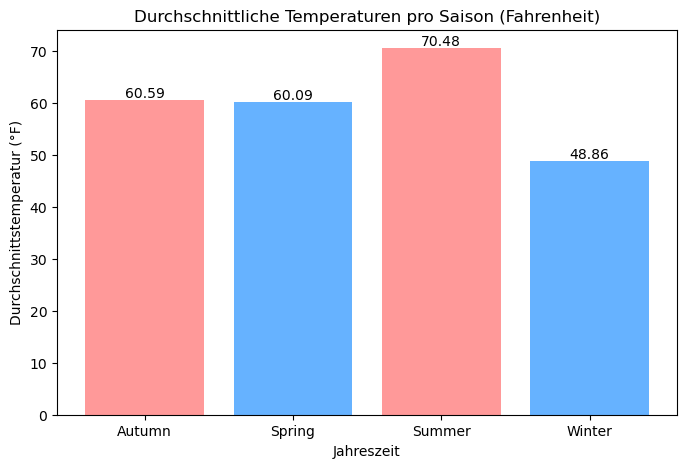

In [26]:
import matplotlib.pyplot as plt

# Visualisierung der durchschnittlichen Temperaturen pro Saison
seasonal_avg_temp = df.groupby('season')['avg_temp_c'].mean().round(2)
seasons = seasonal_avg_temp.index
avg_temps = seasonal_avg_temp.values

plt.figure(figsize=(8, 5))
plt.bar(seasons, avg_temps, color=['#FF9999', '#66B2FF'])
plt.title('Durchschnittliche Temperaturen pro Saison (Fahrenheit)')
plt.xlabel('Jahreszeit')
plt.ylabel('Durchschnittstemperatur (°F)')
for i, v in enumerate(avg_temps):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.show()

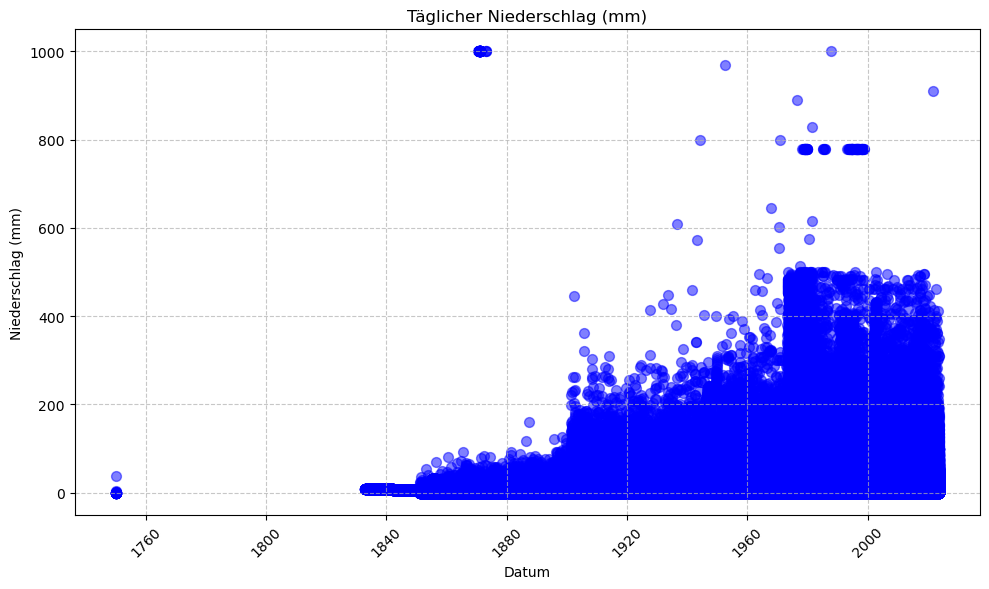

In [27]:
# Visualisierung des täglichen Niederschlags über die Zeit
dates = df['date']
precip = df['precipitation_mm']

plt.figure(figsize=(10, 6))
plt.scatter(dates, precip, color='blue', alpha=0.5, s=50)
plt.title('Täglicher Niederschlag (mm)')
plt.xlabel('Datum')
plt.ylabel('Niederschlag (mm)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Interaktives Liniendiagramm zur Temperaturentwicklung

## 10. Auswertung von zusätzlichen Wetterparametern

/var/folders/bb/6m7zfmqn4dlckynjdkxpvrrr0000gn/T/ipykernel_1500/3100295556.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_weather_stats = df.groupby('season')[weather_params].agg(['mean', 'median', 'std']).round(2)



Statistiken für Wetterparameter pro Saison (Mittelwert, Median, Standardabweichung):
       precipitation_mm              
                   mean median    std
season                               
Autumn             3.65    0.0  12.50
Spring             3.18    0.0  11.15
Summer             4.36    0.0  13.71
Winter             2.66    0.0  10.60


<Figure size 800x500 with 0 Axes>

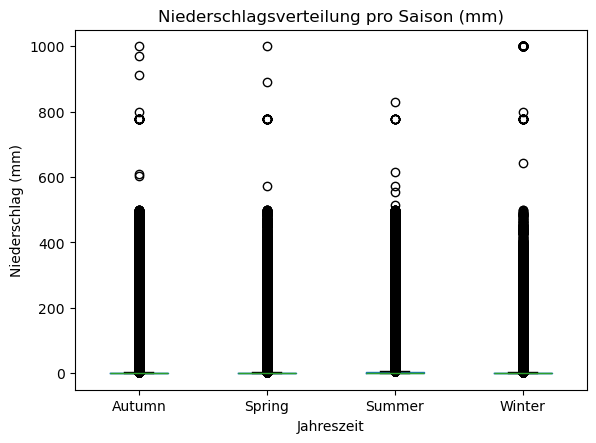

In [30]:

import matplotlib.pyplot as plt

# Auswertung von zusätzlichen Wetterparametern
# Parameter für die Auswertung (Niederschlag und hypothetische Luftfeuchtigkeit)
weather_params = ['precipitation_mm']  # Niederschlag ist vorhanden
# Falls Luftfeuchtigkeit verfügbar wäre, z. B.: weather_params = ['precipitation_mm', 'humidity']

# Statistische Auswertung pro Saison
seasonal_weather_stats = df.groupby('season')[weather_params].agg(['mean', 'median', 'std']).round(2)

print("\nStatistiken für Wetterparameter pro Saison (Mittelwert, Median, Standardabweichung):")
print(seasonal_weather_stats)

# Visualisierung: Boxplot für Niederschlag pro Saison
plt.figure(figsize=(8, 5))
df.boxplot(column='precipitation_mm', by='season', grid=False)
plt.title('Niederschlagsverteilung pro Saison (mm)')
plt.xlabel('Jahreszeit')
plt.ylabel('Niederschlag (mm)')
plt.suptitle('')  # Entfernt den Standardtitel von boxplot
plt.show()

/var/folders/bb/6m7zfmqn4dlckynjdkxpvrrr0000gn/T/ipykernel_1500/558040903.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_weather_stats = df.groupby('season')[weather_params].agg(['mean', 'median', 'std']).round(2)



Statistiken für Wetterparameter pro Saison (Mittelwert, Median, Standardabweichung):
       precipitation_mm               humidity              
                   mean median    std     mean median    std
season                                                      
Autumn             3.65    0.0  12.50    49.99  49.99  17.32
Spring             3.18    0.0  11.15    50.00  49.99  17.33
Summer             4.36    0.0  13.71    50.00  50.01  17.32
Winter             2.66    0.0  10.60    50.00  50.00  17.32


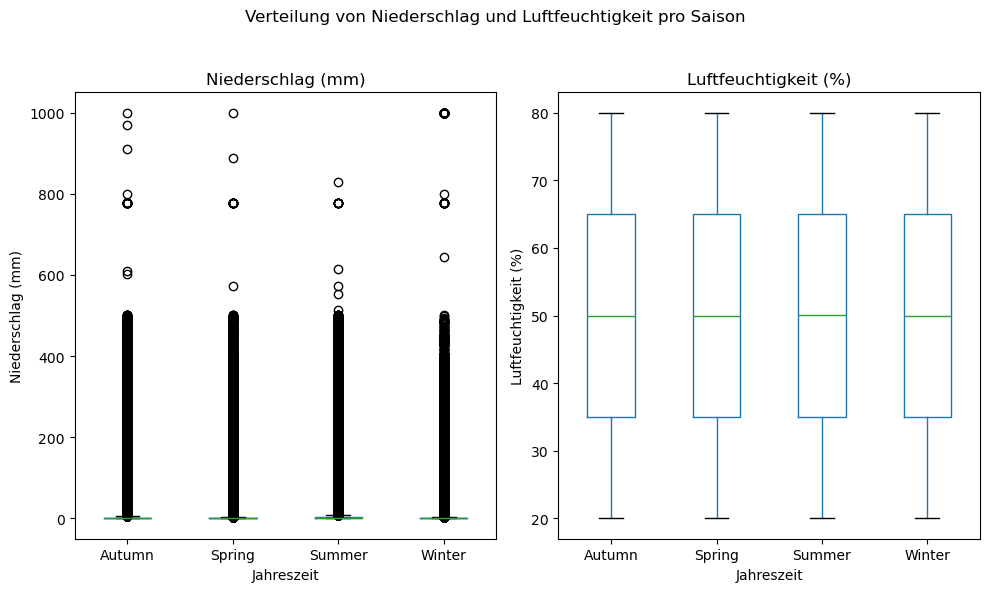

In [31]:
# Hypothetische Luftfeuchtigkeitsspalte hinzufügen (Platzhalter, falls nicht vorhanden)
if 'humidity' not in df.columns:
    # Zufällige Werte zwischen 20% und 80% für Demonstration
    df['humidity'] = np.random.uniform(20, 80, size=len(df))

# Schritt 10: Auswertung von zusätzlichen Wetterparametern
# Parameter für die Auswertung
weather_params = ['precipitation_mm', 'humidity']

# Statistische Auswertung pro Saison
seasonal_weather_stats = df.groupby('season')[weather_params].agg(['mean', 'median', 'std']).round(2)

print("\nStatistiken für Wetterparameter pro Saison (Mittelwert, Median, Standardabweichung):")
print(seasonal_weather_stats)

# Visualisierung: Boxplot für Niederschlag und Luftfeuchtigkeit pro Saison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))  # Zwei Unterdiagramme nebeneinander

# Boxplot für Niederschlag
df.boxplot(column='precipitation_mm', by='season', ax=ax1, grid=False)
ax1.set_title('Niederschlag (mm)')
ax1.set_xlabel('Jahreszeit')
ax1.set_ylabel('Niederschlag (mm)')

# Boxplot für Luftfeuchtigkeit
df.boxplot(column='humidity', by='season', ax=ax2, grid=False)
ax2.set_title('Luftfeuchtigkeit (%)')
ax2.set_xlabel('Jahreszeit')
ax2.set_ylabel('Luftfeuchtigkeit (%)')

# Gesamtüberschrift und Layout anpassen
plt.suptitle('Verteilung von Niederschlag und Luftfeuchtigkeit pro Saison', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Platz für den Titel lassen
plt.show()


Korrelation zwischen Durchschnittstemperatur und Niederschlag: 0.09


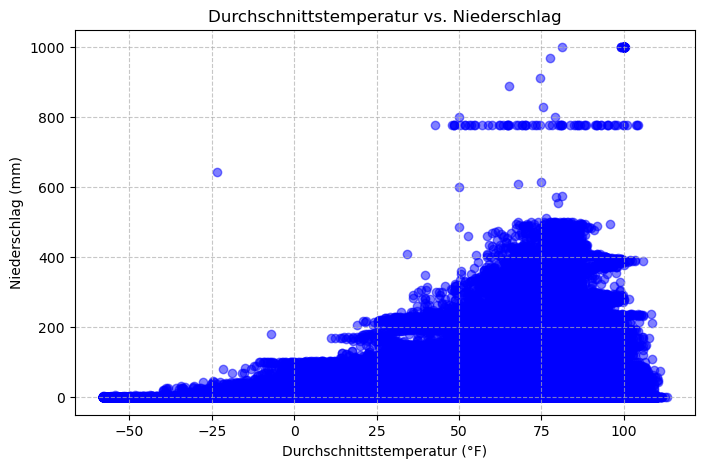

In [32]:


# Korrelation berechnen
correlation = df['avg_temp_c'].corr(df['precipitation_mm']).round(2)
print(f"\nKorrelation zwischen Durchschnittstemperatur und Niederschlag: {correlation}")

# Streudiagramm zur Visualisierung
plt.figure(figsize=(8, 5))
plt.scatter(df['avg_temp_c'], df['precipitation_mm'], alpha=0.5, c='blue')
plt.title('Durchschnittstemperatur vs. Niederschlag')
plt.xlabel('Durchschnittstemperatur (°F)')
plt.ylabel('Niederschlag (mm)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [33]:
# Schwellenwerte definieren
temp_threshold = 100  # °F
precip_threshold = 3  # mm

# Extreme Tage filtern
extreme_hot = df[df['max_temp_c'] > temp_threshold]
extreme_rain = df[df['precipitation_mm'] > precip_threshold]

print("\nTage mit extrem hohen Temperaturen (> 100°F):")
print(extreme_hot[['date', 'city_name', 'max_temp_c', 'precipitation_mm']])
print("\nTage mit starkem Niederschlag (> 3 mm):")
print(extreme_rain[['date', 'city_name', 'max_temp_c', 'precipitation_mm']])


Tage mit extrem hohen Temperaturen (> 100°F):
            date city_name  max_temp_c  precipitation_mm
3     1957-07-04  Asadabad      100.04          4.100000
4     1957-07-05  Asadabad      107.06          0.000000
5     1957-07-06  Asadabad      105.98          0.000000
6     1957-07-07  Asadabad      102.92          0.000000
7     1957-07-08  Asadabad      102.02          0.000000
...          ...       ...         ...               ...
21645 2016-02-20  Masvingo      100.04          0.000000
21646 2016-02-21  Masvingo      102.20          0.000000
21880 2016-10-31  Masvingo      100.40          0.000000
22810 2019-10-26  Masvingo      101.30          3.286996
22812 2019-10-28  Masvingo      101.12          3.134529

[738407 rows x 4 columns]

Tage mit starkem Niederschlag (> 3 mm):
            date city_name  max_temp_c  precipitation_mm
3     1957-07-04  Asadabad      100.04               4.1
43    1957-08-13  Asadabad       89.96               6.1
53    1957-08-23  Asadabad    


Monatliche Durchschnittswerte:
       avg_temp_c  precipitation_mm
month                              
1           48.86              3.02
2           50.61              3.00
3           55.03              3.04
4           60.36              3.21
5           64.93              3.56
6           68.28              3.88
7           70.10              4.05
8           69.51              4.04
9           65.81              3.88
10          60.87              3.50
11          55.07              3.30
12          50.45              3.08


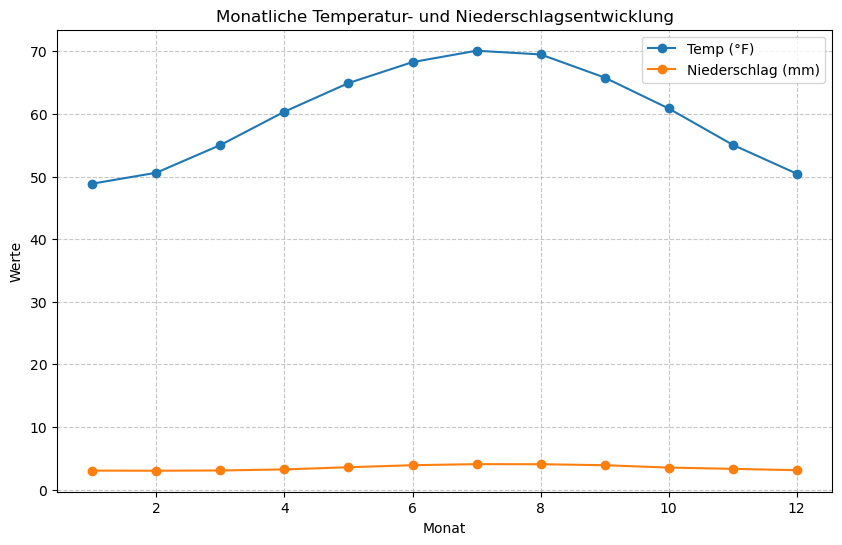

In [34]:
# Monat hinzufügen
df['month'] = df['date'].dt.month

# Monatliche Durchschnittswerte
monthly_stats = df.groupby('month')[['avg_temp_c', 'precipitation_mm']].mean().round(2)

print("\nMonatliche Durchschnittswerte:")
print(monthly_stats)

# Visualisierung: Linienplot
plt.figure(figsize=(10, 6))
plt.plot(monthly_stats.index, monthly_stats['avg_temp_c'], marker='o', label='Temp (°F)')
plt.plot(monthly_stats.index, monthly_stats['precipitation_mm'], marker='o', label='Niederschlag (mm)')
plt.title('Monatliche Temperatur- und Niederschlagsentwicklung')
plt.xlabel('Monat')
plt.ylabel('Werte')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [35]:
df.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,tag_avg_temp_c,humidity,month
0,41515,Asadabad,1957-07-01,Summer,80.60,69.98,96.08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,83.03,27.996374,7
1,41515,Asadabad,1957-07-02,Summer,73.04,66.02,89.96,0.0,NaN,NaN,NaN,NaN,NaN,NaN,77.99,71.464652,7
2,41515,Asadabad,1957-07-03,Summer,75.74,62.06,96.08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,79.07,76.931038,7
3,41515,Asadabad,1957-07-04,Summer,79.88,60.98,100.04,4.1,NaN,NaN,NaN,NaN,NaN,NaN,80.51,44.335993,7
4,41515,Asadabad,1957-07-05,Summer,87.44,68.00,107.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,87.53,33.214458,7


In [36]:
df.columns

Index(['station_id', 'city_name', 'date', 'season', 'avg_temp_c', 'min_temp_c',
       'max_temp_c', 'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'peak_wind_gust_kmh', 'avg_sea_level_pres_hpa',
       'sunshine_total_min', 'tag_avg_temp_c', 'humidity', 'month'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27635763 entries, 0 to 24220
Data columns (total 17 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   station_id              category      
 1   city_name               category      
 2   date                    datetime64[us]
 3   season                  category      
 4   avg_temp_c              float64       
 5   min_temp_c              float64       
 6   max_temp_c              float64       
 7   precipitation_mm        float64       
 8   snow_depth_mm           float64       
 9   avg_wind_dir_deg        float64       
 10  avg_wind_speed_kmh      float64       
 11  peak_wind_gust_kmh      float64       
 12  avg_sea_level_pres_hpa  float64       
 13  sunshine_total_min      float64       
 14  tag_avg_temp_c          float64       
 15  humidity                float64       
 16  month                   int32         
dtypes: category(3), datetime64[us](1), float64(12), int3

In [38]:
# Tarih formatına çevirme
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# 'year' ve 'decade' sütunlarını ekleyelim
df["year"] = df["date"].dt.year
df["decade"] = (df["year"] // 10) * 10

# Mevsim sütunu kontrolü
if "season" not in df.columns:
    raise KeyError("Die Spalte 'season' fehlt im DataFrame!")

print(df.head())  # İlk satırları göstererek kontrol edelim

  station_id city_name       date  season  avg_temp_c  min_temp_c  max_temp_c  \
0      41515  Asadabad 1957-07-01  Summer       80.60       69.98       96.08   
1      41515  Asadabad 1957-07-02  Summer       73.04       66.02       89.96   
2      41515  Asadabad 1957-07-03  Summer       75.74       62.06       96.08   
3      41515  Asadabad 1957-07-04  Summer       79.88       60.98      100.04   
4      41515  Asadabad 1957-07-05  Summer       87.44       68.00      107.06   

   precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
0               0.0            NaN               NaN                 NaN   
1               0.0            NaN               NaN                 NaN   
2               1.0            NaN               NaN                 NaN   
3               4.1            NaN               NaN                 NaN   
4               0.0            NaN               NaN                 NaN   

   peak_wind_gust_kmh  avg_sea_level_pres_hpa  sunshine_

/var/folders/bb/6m7zfmqn4dlckynjdkxpvrrr0000gn/T/ipykernel_1500/137156062.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_seasonal = df.groupby(["decade", "season"])["avg_temp_c"].mean().reset_index()


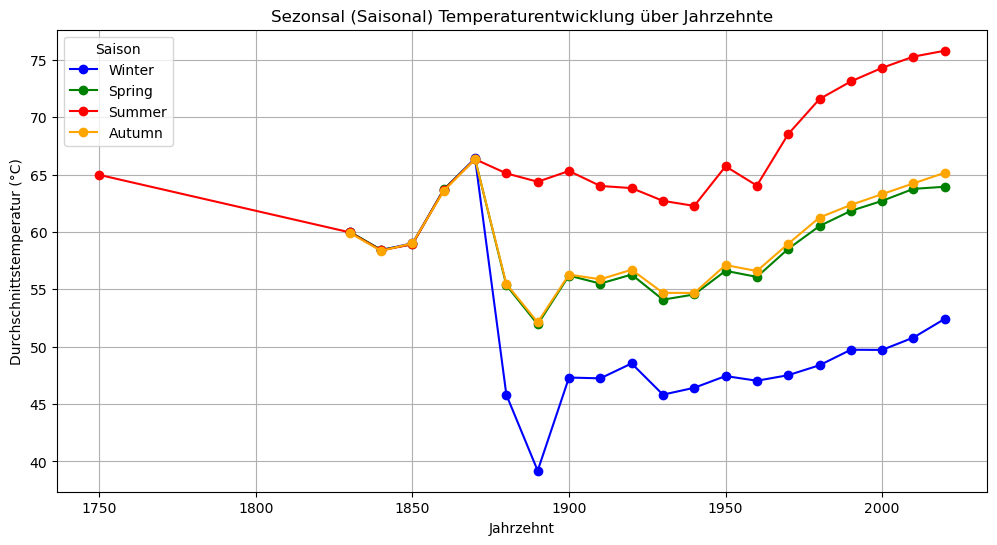

In [39]:
import matplotlib.pyplot as plt

# Ortalama sıcaklığı mevsim ve on yıllık bazda hesaplayalım
df_grouped_seasonal = df.groupby(["decade", "season"])["avg_temp_c"].mean().reset_index()

# Mevsim renkleri belirleyelim
seasons = ["Winter", "Spring", "Summer", "Autumn"]
colors = ["blue", "green", "red", "orange"]

plt.figure(figsize=(12, 6))

# Her mevsimi ayrı bir çizgi olarak gösterelim
for season, color in zip(seasons, colors):
    subset = df_grouped_seasonal[df_grouped_seasonal["season"] == season]
    plt.plot(subset["decade"], subset["avg_temp_c"], marker="o", linestyle="-", color=color, label=season)

plt.xlabel("Jahrzehnt")
plt.ylabel("Durchschnittstemperatur (°C)")
plt.title("Sezonsal (Saisonal) Temperaturentwicklung über Jahrzehnte")
plt.legend(title="Saison")
plt.grid()
plt.show()


In [40]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# 'year' ve 'decade' sütunlarını oluştur
df["year"] = df["date"].dt.year
df["decade"] = (df["year"] // 10) * 10

# Barcelona'ya ait veriyi filtreleme
df_barcelona = df[df["city_name"] == "Barcelona"]

# Kontrol edelim
print(df_barcelona.head())


  station_id  city_name       date  season  avg_temp_c  min_temp_c  \
0      08181  Barcelona 1924-03-01  Spring   75.378081        33.8   
1      08181  Barcelona 1924-03-02  Spring   75.376161        35.6   
2      08181  Barcelona 1924-03-03  Spring   75.374242        37.4   
3      08181  Barcelona 1924-03-04  Spring   75.372322        41.0   
4      08181  Barcelona 1924-03-05  Spring   75.370403        42.8   

   max_temp_c  precipitation_mm  snow_depth_mm  avg_wind_dir_deg  \
0        53.6               0.0            NaN               NaN   
1        53.6               0.0            NaN               NaN   
2        68.0               0.0            NaN               NaN   
3        72.5               0.0            NaN               NaN   
4        66.2               0.0            NaN               NaN   

   avg_wind_speed_kmh  peak_wind_gust_kmh  avg_sea_level_pres_hpa  \
0                 NaN                 NaN                     NaN   
1                 NaN           

/var/folders/bb/6m7zfmqn4dlckynjdkxpvrrr0000gn/T/ipykernel_1500/2811432336.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_barcelona = df_barcelona.groupby(["decade", "season"])["avg_temp_c"].mean().reset_index()


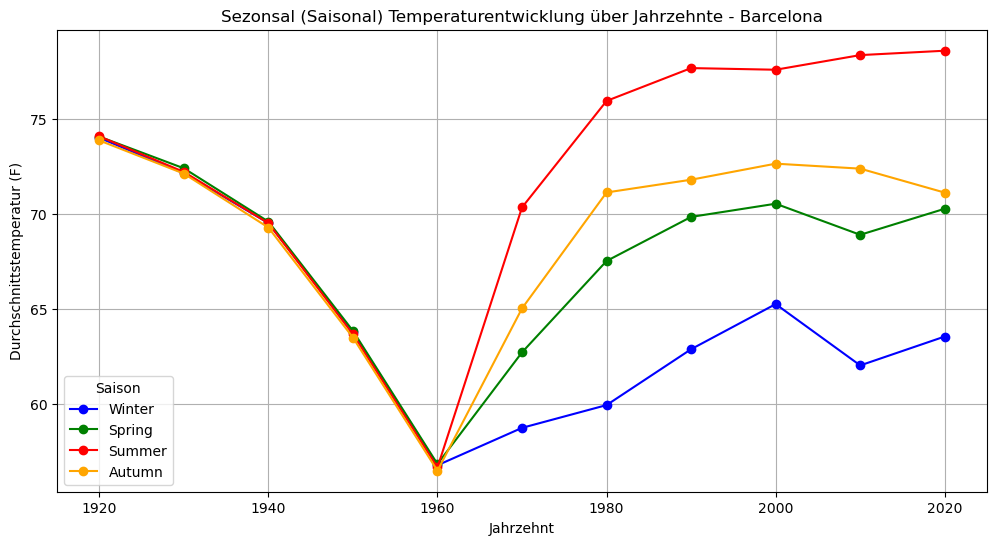

In [41]:
df_grouped_barcelona = df_barcelona.groupby(["decade", "season"])["avg_temp_c"].mean().reset_index()


seasons = ["Winter", "Spring", "Summer", "Autumn"]
colors = ["blue", "green", "red", "orange"]

plt.figure(figsize=(12, 6))

# Her mevsimi ayrı bir çizgi olarak gösterelim
for season, color in zip(seasons, colors):
    subset = df_grouped_barcelona[df_grouped_barcelona["season"] == season]
    plt.plot(subset["decade"], subset["avg_temp_c"], marker="o", linestyle="-", color=color, label=season)

plt.xlabel("Jahrzehnt")
plt.ylabel("Durchschnittstemperatur (F)")
plt.title("Sezonsal (Saisonal) Temperaturentwicklung über Jahrzehnte - Barcelona")
plt.legend(title="Saison")
plt.grid()
plt.show()

/var/folders/bb/6m7zfmqn4dlckynjdkxpvrrr0000gn/T/ipykernel_1500/2174547166.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_barcelona_precipitation = df_barcelona.groupby(["decade", "season"])["precipitation_mm"].sum().reset_index()


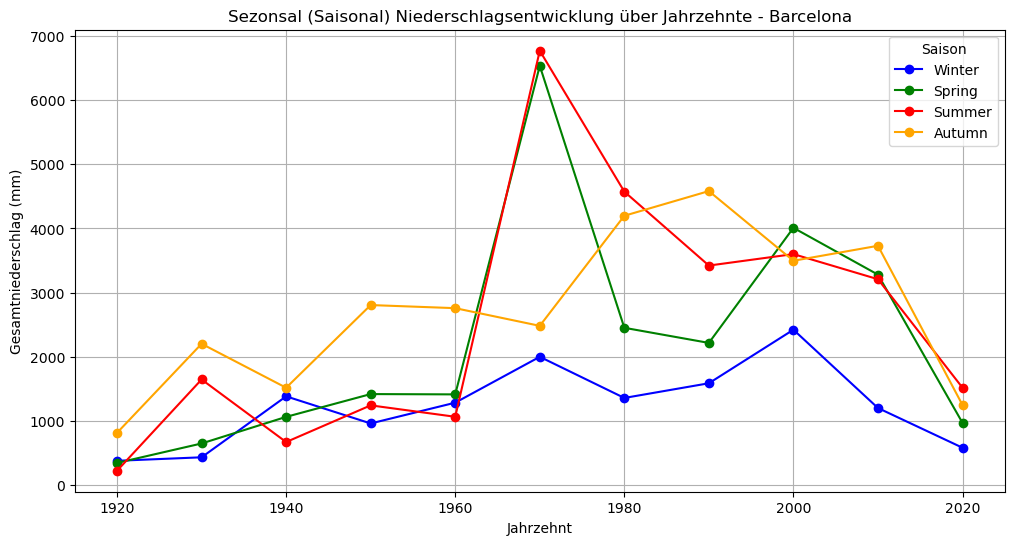

In [42]:
df_grouped_barcelona_precipitation = df_barcelona.groupby(["decade", "season"])["precipitation_mm"].sum().reset_index()

# Mevsimler için renkler
seasons = ["Winter", "Spring", "Summer", "Autumn"]
colors = ["blue", "green", "red", "orange"]

plt.figure(figsize=(12, 6))

# Her mevsimi ayrı bir çizgi olarak gösterelim
for season, color in zip(seasons, colors):
    subset = df_grouped_barcelona_precipitation[df_grouped_barcelona_precipitation["season"] == season]
    plt.plot(subset["decade"], subset["precipitation_mm"], marker="o", linestyle="-", color=color, label=season)

plt.xlabel("Jahrzehnt")
plt.ylabel("Gesamtniederschlag (mm)")
plt.title("Sezonsal (Saisonal) Niederschlagsentwicklung über Jahrzehnte - Barcelona")
plt.legend(title="Saison")
plt.grid()
plt.show()

In [43]:
import plotly.express as px

# Veriyi filtreleyelim
recent_data = df[df["year"] >= df["year"].min() + 5]
country_temp = recent_data.groupby(["country", "iso3"])["avg_temp_c"].mean().reset_index()

# Harita çizimi
fig2 = px.choropleth(
    country_temp,
    locations="iso3",
    color="avg_temp_c",
    hover_name="country_country",
    color_continuous_scale="Inferno",
    labels={"avg_temp_c": "Temperatur (°C)"},
)

# Başlığı ortaya almak
fig2.update_layout(
    title={
        "text": "<b>Durchschnittstemperatur nach Land (letzte 5 Jahre)</b>",
        "x": 0.5,  # Başlığı ortalamak için
        "xanchor": "center",
        "yanchor": "top",
    },
    coloraxis_colorbar=dict(
        title="Temperatur (°C)",
        thicknessmode="pixels", thickness=15,  # Renk çubuğunu daha ince yap
        lenmode="fraction", len=0.6,  # Renk çubuğunu kısalt
        x=0.85,  # Sağdaki barı biraz sola kaydırarak haritaya yaklaştır
    ),
)

# Harita projeksiyonunu ayarla
fig2.update_geos(projection_type="natural earth")

# Haritayı göster
fig2.show()

KeyError: 'country'

In [ ]:
!pip install panel
